In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
url = "https://english.elpais.com/"

In [5]:
r = requests.get(url)
content = r.content

In [8]:
soup1 = BeautifulSoup(content,'html.parser')
results = soup1.find_all('h2', attrs ={'class':'headline'})

EXTRACTING NEWS FROM VARIOUS SOURCES

In [93]:
record = []
for result in results:
    #link of article
    link = result.find('a')['href']
    
    #title of article
    title = result.get_text()
    
    #category of article
    List = link.split('/')
    category = List[1]
    
    #news content
    new_url =  url+ link
    news_r1 = requests.get(new_url)
    news_content = news_r1.content
    soup2 = BeautifulSoup(news_content,'html.parser')
    article = soup2.find_all('div', attrs ={'class':'a_w'})
    if(len(article) == 0):
        continue
    x = article[0].find_all('p')
    if(len(x) == 0):
        continue
    final_article = ""
    for para in x:
        final_article += para.get_text() + " "
    
    #Author of article
    no_of_authors = soup2.find_all('a', attrs ={'class':'a_aut_n'})
    if(len(no_of_authors)==0):
        continue
    author = []
    for a in no_of_authors:
        author.append(a.get_text())
        
    #Date of article
    dateAndtime = soup2.find_all('a', attrs ={'class':'a_ti'})
    res = dateAndtime[0].get_text()
    date = res.split('-')[0]
    #to translate some months written in spanish in english
    date_list = date.split(' ')
    if(date_list[1] == "ago"):
        date_list[1] = "aug"
    if(date_list[1] == "abr"):
        date_list[1] = "apr"
    if(date_list[1] == "ene"):
        date_list[1] = "jan"
    date = " ".join(date_list)
    time = res.split('-')[1]
    
    
    record.append((date, time, title, category, link,final_article, author))

In [94]:
import pandas as pd

In [95]:
df = pd.DataFrame(record, columns = ['Date', 'Time', 'Title', 'Category','Link', 'Description', 'Author'])

In [96]:
df['Date'] = pd.to_datetime(df['Date'])

In [97]:
df

,Date,Time,Title,Category,Link,Description,Author
0,2020-09-25,15:30 UTC,Ten covert police operations that took place u...,spanish_news,/spanish_news/2020-09-25/ten-covert-police-ope...,Jorge Fernández Díaz first stepped into his ne...,"[José Manuel Romero, Pablo Ordaz, Iñigo Domíng..."
1,2020-09-25,11:56 UTC,Madrid extends coronavirus restrictions on mob...,society,/society/2020-09-25/madrid-extends-coronavirus...,The Madrid regional government announced on Fr...,[El País]
2,2020-09-25,06:45 UTC,"Spain reports 10,653 new coronavirus cases but...",society,/society/2020-09-25/spain-reports-10653-new-co...,"The incidence of the coronavirus in Spain, whi...",[Pablo Linde]
3,2020-09-25,07:12 UTC,"Nearly 3,000 classes in Spain forced to quaran...",society,/society/2020-09-25/nearly-3000-classes-in-spa...,The coronavirus has forced students of all age...,[Ignacio Zafra]
4,2020-09-25,07:37 UTC,"As Madrid is offered 7,500 military personnel ...",society,/society/2020-09-25/as-madrid-is-offered-7500-...,The rapid spread of the second wave of the cor...,"[Elena G. Sevillano, Juan José Mateo Ruiz-Gálv..."
5,2020-09-24,10:14 UTC,Spanish government to consider pardon requests...,politics,/politics/catalonia_independence/2020-09-24/sp...,The Spanish government will next week begin co...,"[Javier Casqueiro, Anabel Díez, Lucía Tolosa, ..."
6,2020-09-24,10:16 UTC,Spanish Supreme Court rules food-delivery ride...,economy_and_business,/economy_and_business/2020-09-24/spanish-supre...,The Spanish Supreme Court ruled on Wednesday t...,[Manuel V. Gómez]
7,2020-09-14,06:45 UTC,Economic physiotherapy,opinion,/opinion/2020-09-14/economic-physiotherapy.html,"No, the worst of the crisis is not yet to come...",[Ángel Ubide]
8,2020-09-25,06:47 UTC,El Roto,opinion,/opinion/2020-09-25/el-roto.html,,[El Roto]
9,2020-09-08,11:49 UTC,Rethinking the European spirit,opinion,/opinion/2020-09-08/rethinking-the-european-sp...,"In The World of Yesterday, Austrian novelist S...",[Orlando Figes]


In [98]:
df[df['Category'] != 'elpais'] #remove promotional matter

,Date,Time,Title,Category,Link,Description,Author
0,2020-09-25,15:30 UTC,Ten covert police operations that took place u...,spanish_news,/spanish_news/2020-09-25/ten-covert-police-ope...,Jorge Fernández Díaz first stepped into his ne...,"[José Manuel Romero, Pablo Ordaz, Iñigo Domíng..."
1,2020-09-25,11:56 UTC,Madrid extends coronavirus restrictions on mob...,society,/society/2020-09-25/madrid-extends-coronavirus...,The Madrid regional government announced on Fr...,[El País]
2,2020-09-25,06:45 UTC,"Spain reports 10,653 new coronavirus cases but...",society,/society/2020-09-25/spain-reports-10653-new-co...,"The incidence of the coronavirus in Spain, whi...",[Pablo Linde]
3,2020-09-25,07:12 UTC,"Nearly 3,000 classes in Spain forced to quaran...",society,/society/2020-09-25/nearly-3000-classes-in-spa...,The coronavirus has forced students of all age...,[Ignacio Zafra]
4,2020-09-25,07:37 UTC,"As Madrid is offered 7,500 military personnel ...",society,/society/2020-09-25/as-madrid-is-offered-7500-...,The rapid spread of the second wave of the cor...,"[Elena G. Sevillano, Juan José Mateo Ruiz-Gálv..."
5,2020-09-24,10:14 UTC,Spanish government to consider pardon requests...,politics,/politics/catalonia_independence/2020-09-24/sp...,The Spanish government will next week begin co...,"[Javier Casqueiro, Anabel Díez, Lucía Tolosa, ..."
6,2020-09-24,10:16 UTC,Spanish Supreme Court rules food-delivery ride...,economy_and_business,/economy_and_business/2020-09-24/spanish-supre...,The Spanish Supreme Court ruled on Wednesday t...,[Manuel V. Gómez]
7,2020-09-14,06:45 UTC,Economic physiotherapy,opinion,/opinion/2020-09-14/economic-physiotherapy.html,"No, the worst of the crisis is not yet to come...",[Ángel Ubide]
8,2020-09-25,06:47 UTC,El Roto,opinion,/opinion/2020-09-25/el-roto.html,,[El Roto]
9,2020-09-08,11:49 UTC,Rethinking the European spirit,opinion,/opinion/2020-09-08/rethinking-the-european-sp...,"In The World of Yesterday, Austrian novelist S...",[Orlando Figes]


In [102]:
df[df['Category']!='elpais'].to_csv('elpais_2020_09_20.csv', index=False, encoding='utf-8')

# EXPLANATORY DATA ANALYSIS

The EDA applied on text data are:- 

1.Number of article in each category.

2.Number of aarticles on each day.

3.News Length Distribution -Word Count

4.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('elpais_2020_09_20.csv')

1. Number of article in each category

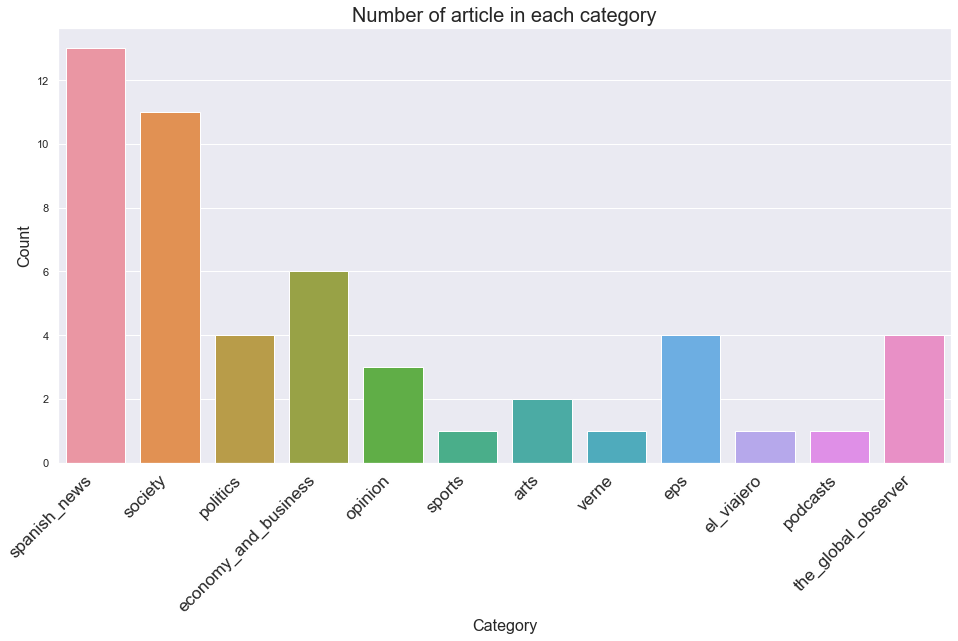

In [68]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16,8))
plt.title('Number of article in each category', fontsize=20)
ax = sns.countplot(x="Category", data=data)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='x-large' 
)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

2.Percentage of articles of each category

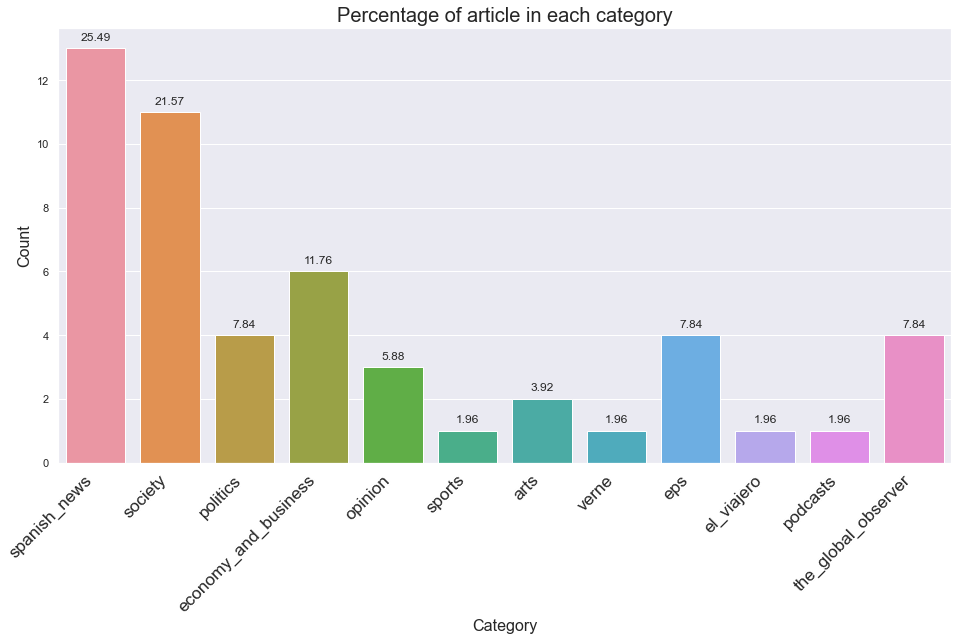

In [70]:
plt.figure(figsize = (16,8))
ax = sns.countplot(x="Category", data=data)
total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height +0.25,
            '{:1.2f}'.format((height*100)/total),ha="center")
    
plt.title('Percentage of article in each category', fontsize= 20)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='x-large' 
)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

3. News Length distribution - Word Count

In [54]:
data['News_length'] = data['Description'].str.len()

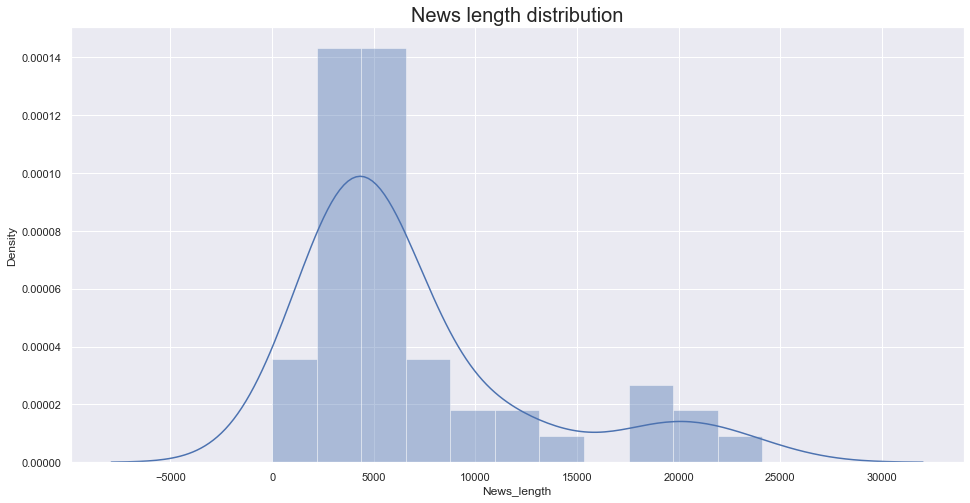

In [57]:
plt.figure(figsize=(16,8))
sns.distplot(data['News_length']).set_title('News length distribution',fontsize=20);

In [58]:
data['News_length'].describe()

count       51.000000
mean      6943.588235
std       5788.015937
min          1.000000
25%       3481.500000
50%       5003.000000
75%       7634.500000
max      24113.000000
Name: News_length, dtype: float64

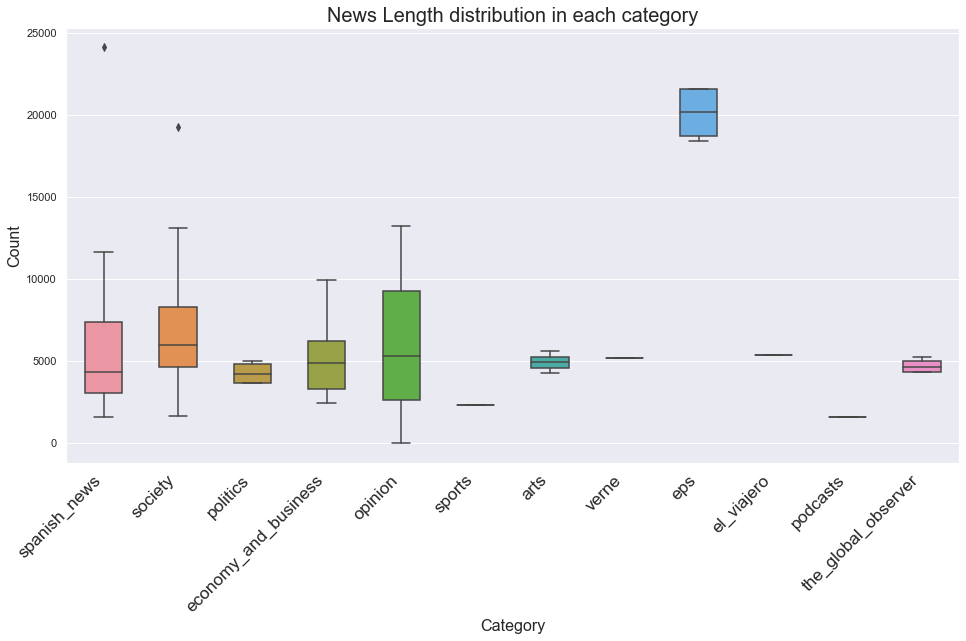

In [71]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='Category', y='News_length', width=.5);

plt.title('News Length distribution in each category', fontsize= 20)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='x-large' 
)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

In [77]:
quantile_80 = data['News_length'].quantile(0.80)
data_80  = data[data['News_length']<quantile_80]

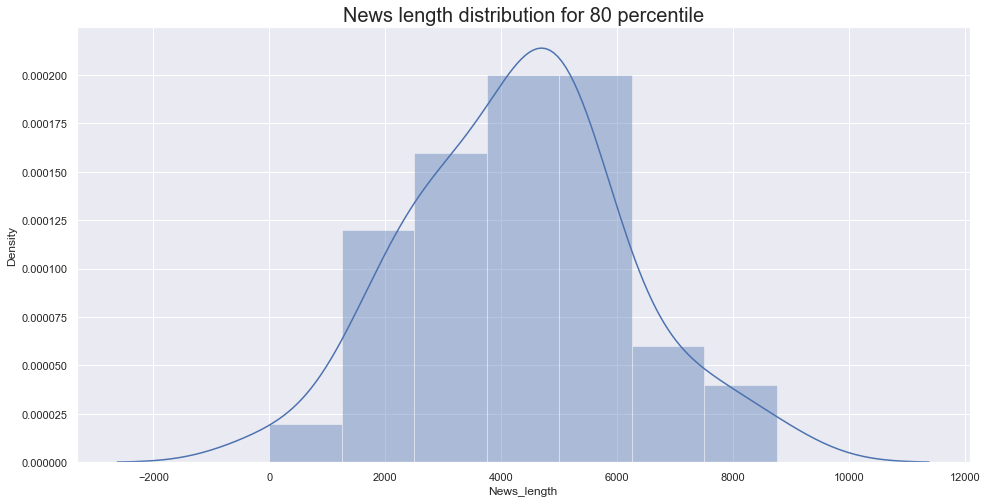

In [80]:
plt.figure(figsize=(16,8))
sns.distplot(data_80['News_length']).set_title('News length distribution for 80 percentile',fontsize =20);


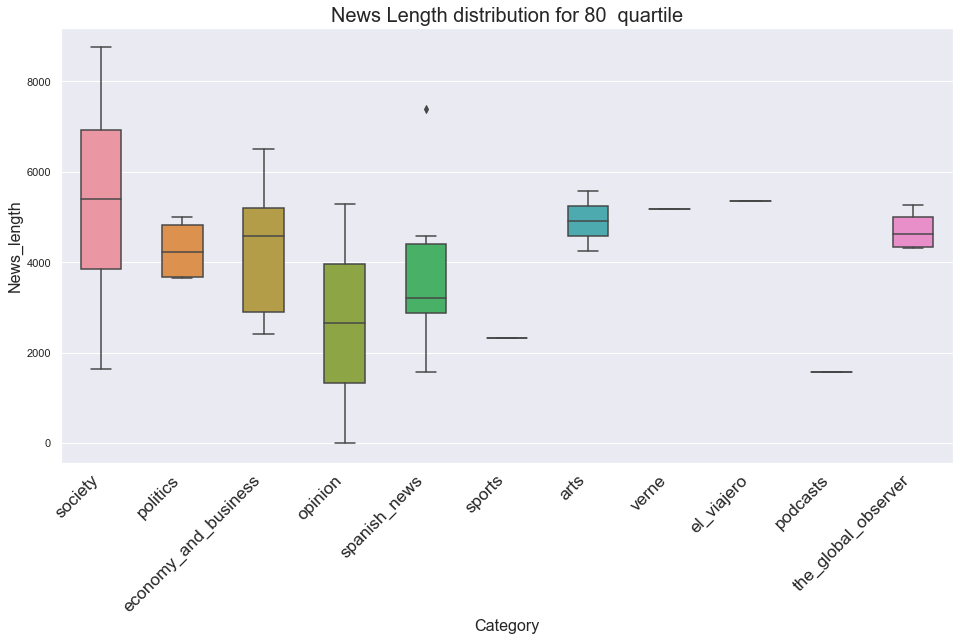

In [82]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data_80, x='Category', y='News_length', width=.5);

plt.title('News Length distribution for 80  quartile', fontsize= 20)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontsize='x-large' 
)
plt.xlabel('Category', fontsize=16)
plt.ylabel('News_length', fontsize=16)
plt.show()